### Entendimento de negócio. Ciclo de vida do cliente.

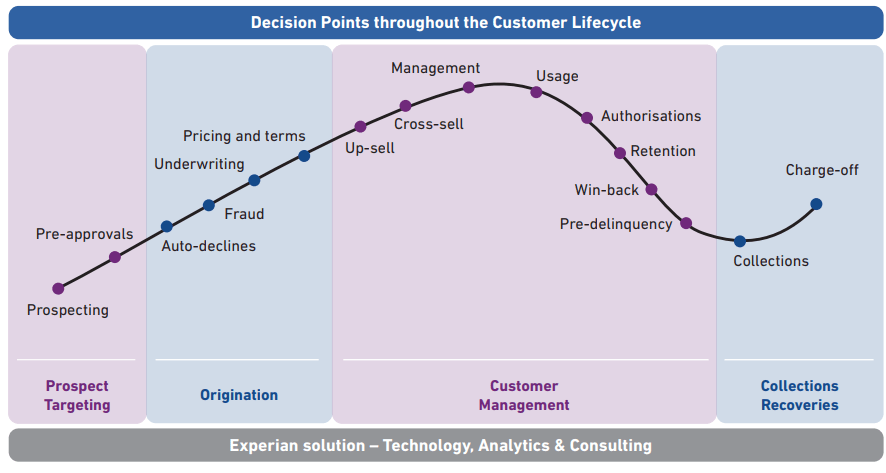

In [110]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

In [111]:
# Carregando a base de dados.

df = pd.read_csv(r"../../../material/#ZM/Ciencia dos Dados na Pratica-Outspoken-2020/6. Ciência dos Dados com Python/3. 3 Aprovação de Cartão de Crédito - Regressão Logística/Materiais/cc_approvals.data", header = None)

In [112]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


Os dados são anônimos

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [115]:
df.shape

(690, 16)

Verificando se tem valores faltantes

In [117]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

Não tem dados faltantes? no código acima não, no código abaixo mostra o contrario. '?' seria os missing values

In [119]:
df[0].value_counts()

0
b    468
a    210
?     12
Name: count, dtype: int64

Substituindo ? por valores faltantes(nan)

In [121]:
df = df.replace('?', np.NaN)

In [122]:
df[0].value_counts()

0
b    468
a    210
Name: count, dtype: int64

Substituindo o nan com o valor da frente

In [124]:
df = df.fillna(method='ffill')

C:\Users\Kaio\AppData\Local\Temp\ipykernel_12108\569672361.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [125]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [126]:
# removendo a coluna de cep
df = df.drop(df.columns[13], axis=1)

In [127]:
df.columns = ['var1','var2','var3','var4','var5','var6','var7','var8','var9','var10','var11','var12','var13','var14','alvo']

In [128]:
df.head()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,alvo
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,0,+


Convertendo valores categóricos

In [130]:
encoder = LabelEncoder()

for var in df.columns:
    if df[var].dtype == 'object':
        df[var] = encoder.fit_transform(df[var])

In [131]:
df.head()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,alvo
0,1,156,0.000,1,0,12,7,1.25,1,1,1,0,0,0,0
1,0,328,4.460,1,0,10,3,3.04,1,1,6,0,0,560,0
2,0,89,0.500,1,0,10,3,1.50,1,0,0,0,0,824,0
3,1,125,1.540,1,0,12,7,3.75,1,1,5,1,0,3,0
4,1,43,5.625,1,0,12,7,1.71,1,0,0,0,2,0,0


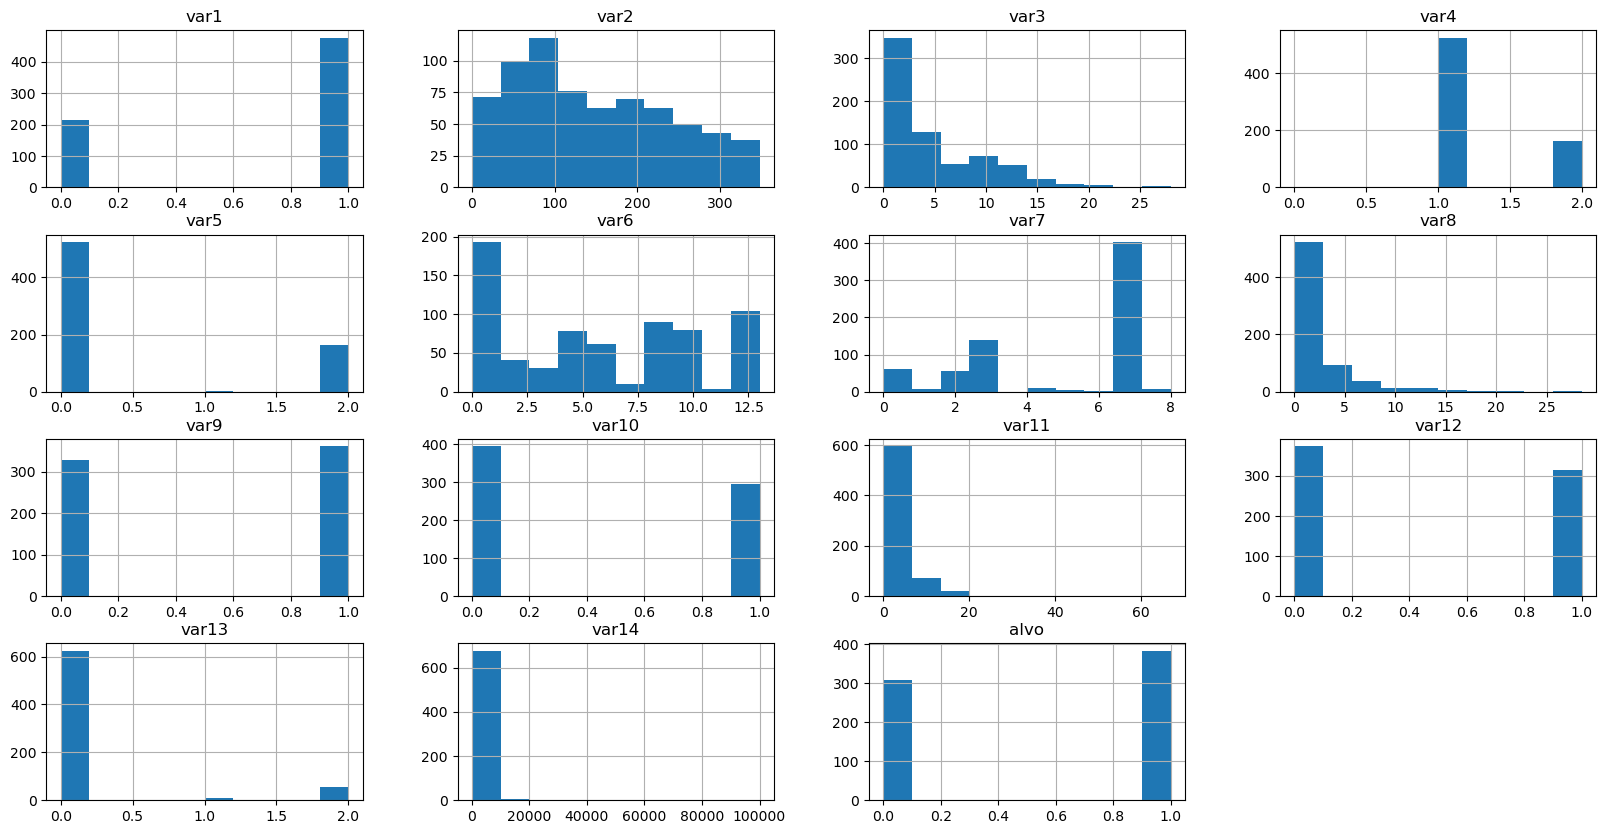

In [132]:
df.hist()
plt.gcf().set_size_inches(20,10)

In [133]:
df[['var2','alvo']]

,var2,alvo
0,156,0
1,328,0
2,89,0
3,125,0
4,43,0
...,...,...
685,52,1
686,71,1
687,97,1
688,20,1


In [134]:
# Criação de uma lista chamada 'var2_list' que contém intervalos de valores baseados na coluna 'var2' do DataFrame 'df'.
# Os valores são gerados a partir do valor mínimo até o valor máximo de 'var2', em incrementos de 50.
var2_list = list(range(df.var2.min(), df.var2.max()+100, 50))

# Criação de uma lista chamada 'name_list' que contém nomes para cada intervalo em 'var2_list'.
# O formato dos nomes é 'var2_0', 'var2_1', ..., até o número de intervalos menos um.
name_list = [f'var2_{i}' for i in range(len(var2_list)-1)]

# Criação de uma nova coluna 'var2_int' no DataFrame 'df'.
# A função pd.cut é utilizada para segmentar os dados da coluna 'var2' em intervalos definidos por 'var2_list'.
# Cada intervalo recebe um rótulo correspondente da lista 'name_list'.
# A opção include_lowest=True garante que o menor valor em 'var2' seja incluído no primeiro intervalo.
df['var2_int'] = pd.cut(df.var2, var2_list, labels=name_list, include_lowest=True)


In [135]:
df.head()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,alvo,var2_int
0,1,156,0.000,1,0,12,7,1.25,1,1,1,0,0,0,0,var2_3
1,0,328,4.460,1,0,10,3,3.04,1,1,6,0,0,560,0,var2_6
2,0,89,0.500,1,0,10,3,1.50,1,0,0,0,0,824,0,var2_1
3,1,125,1.540,1,0,12,7,3.75,1,1,5,1,0,3,0,var2_2
4,1,43,5.625,1,0,12,7,1.71,1,0,0,0,2,0,0,var2_0


In [136]:
import pandas as pd



cross_df = pd.crosstab(index=df['alvo'], columns=df['var2_int'])
cross_df.index = ["Rejected", "Accepted"]
print(cross_df)

var2_int  var2_0  var2_1  var2_2  var2_3  var2_4  var2_5  var2_6
Rejected      44      65      45      39      42      40      32
Accepted      79      91      62      61      45      26      19


In [137]:
df.isna().sum()

var1        0
var2        0
var3        0
var4        0
var5        0
var6        0
var7        0
var8        0
var9        0
var10       0
var11       0
var12       0
var13       0
var14       0
alvo        0
var2_int    0
dtype: int64

In [138]:
df = df.drop('var2', axis=1)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   var1      690 non-null    int32   
 1   var3      690 non-null    float64 
 2   var4      690 non-null    int32   
 3   var5      690 non-null    int32   
 4   var6      690 non-null    int32   
 5   var7      690 non-null    int32   
 6   var8      690 non-null    float64 
 7   var9      690 non-null    int32   
 8   var10     690 non-null    int32   
 9   var11     690 non-null    int64   
 10  var12     690 non-null    int32   
 11  var13     690 non-null    int32   
 12  var14     690 non-null    int64   
 13  alvo      690 non-null    int32   
 14  var2_int  690 non-null    category
dtypes: category(1), float64(2), int32(10), int64(2)
memory usage: 49.7 KB


In [140]:
categorias = {"var2_int": {"var2_0": 0, "var2_1": 1 , "var2_2": 2,
                            "var2_3": 3, "var2_4": 4, "var2_5": 5, "var2_6": 6}}
df.replace(categorias, inplace=True)
df.head()

C:\Users\Kaio\AppData\Local\Temp\ipykernel_12108\918420722.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df.replace(categorias, inplace=True)


,var1,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,alvo,var2_int
0,1,0.000,1,0,12,7,1.25,1,1,1,0,0,0,0,3
1,0,4.460,1,0,10,3,3.04,1,1,6,0,0,560,0,6
2,0,0.500,1,0,10,3,1.50,1,0,0,0,0,824,0,1
3,1,1.540,1,0,12,7,3.75,1,1,5,1,0,3,0,2
4,1,5.625,1,0,12,7,1.71,1,0,0,0,2,0,0,0


Aplicando para o var 3 e var 14

In [142]:
var3_list = np.arange(df.var3.min(), df.var3.max()+10, 4.0)

# Criação da lista de nomes para os intervalos
name_list = [f'var3_{i}' for i in range(len(var3_list) - 1)]

# Segmentação dos dados e criação da nova coluna no DataFrame
df['var3_int'] = pd.cut(df.var3, var3_list, labels=name_list, include_lowest=True)

In [143]:
categorias = {"var3_int": {"var3_0": 0, "var3_1": 1 , "var3_2": 2,
                            "var3_3": 3, "var3_4": 4, "var3_5": 5, "var3_6": 6}}
df.replace(categorias, inplace=True)
df.head()

C:\Users\Kaio\AppData\Local\Temp\ipykernel_12108\4024479538.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df.replace(categorias, inplace=True)


,var1,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,alvo,var2_int,var3_int
0,1,0.000,1,0,12,7,1.25,1,1,1,0,0,0,0,3,0
1,0,4.460,1,0,10,3,3.04,1,1,6,0,0,560,0,6,1
2,0,0.500,1,0,10,3,1.50,1,0,0,0,0,824,0,1,0
3,1,1.540,1,0,12,7,3.75,1,1,5,1,0,3,0,2,0
4,1,5.625,1,0,12,7,1.71,1,0,0,0,2,0,0,0,1


In [144]:
df.isna().sum()

var1        0
var3        0
var4        0
var5        0
var6        0
var7        0
var8        0
var9        0
var10       0
var11       0
var12       0
var13       0
var14       0
alvo        0
var2_int    0
var3_int    0
dtype: int64

In [145]:
cross_df = pd.crosstab(index=df['alvo'], columns=df['var3_int'])
cross_df.index = ["Rejected", "Accepted"]
print(cross_df)

var3_int    0   1   2   3  4  5  6
Rejected  145  64  59  25  7  4  3
Accepted  269  51  38  19  4  0  2


In [146]:
var14_list = np.arange(df.var14.min(), df.var14.max()+100, 1000)

# Criação da lista de nomes para os intervalos
name_list = [f'var14_{i}' for i in range(len(var14_list) - 1)]

# Segmentação dos dados e criação da nova coluna no DataFrame
df['var14_int'] = pd.cut(df.var14, var14_list, labels=name_list, include_lowest=True)

In [147]:
df

,var1,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,alvo,var2_int,var3_int,var14_int
0,1,0.000,1,0,12,7,1.25,1,1,1,0,0,0,0,3,0,var14_0
1,0,4.460,1,0,10,3,3.04,1,1,6,0,0,560,0,6,1,var14_0
2,0,0.500,1,0,10,3,1.50,1,0,0,0,0,824,0,1,0,var14_0
3,1,1.540,1,0,12,7,3.75,1,1,5,1,0,3,0,2,0,var14_0
4,1,5.625,1,0,12,7,1.71,1,0,0,0,2,0,0,0,1,var14_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,10.085,2,2,4,3,1.25,0,0,0,0,0,0,1,1,2,var14_0
686,0,0.750,1,0,1,7,2.00,0,1,2,1,0,394,1,1,0,var14_0
687,0,13.500,2,2,5,2,2.00,0,1,1,1,0,1,1,1,3,var14_0
688,1,0.205,1,0,0,7,0.04,0,0,0,0,0,750,1,0,0,var14_0


In [148]:
cross_df = pd.crosstab(index=df['alvo'], columns=df['var14_int'])
cross_df.index = ["Rejected", "Accepted"]
cross_df

var14_int,var14_0,var14_1,var14_2,var14_3,var14_4,var14_5,var14_6,var14_7,var14_8,var14_9,...,var14_11,var14_13,var14_14,var14_15,var14_18,var14_26,var14_31,var14_49,var14_51,var14_99
Rejected,224,26,19,6,7,5,2,3,1,2,...,2,1,1,1,1,1,1,1,1,1
Accepted,364,8,4,3,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
categorias = {"var14_int": {"var14_0": 0, "var14_1": 1 , "var14_2": 2,
                            "var14_3": 3, "var14_4": 4, "var14_5": 5, "var14_6": 6}}
df.replace(categorias, inplace=True)
df.head()

C:\Users\Kaio\AppData\Local\Temp\ipykernel_12108\1593819070.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df.replace(categorias, inplace=True)


,var1,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,alvo,var2_int,var3_int,var14_int
0,1,0.000,1,0,12,7,1.25,1,1,1,0,0,0,0,3,0,0
1,0,4.460,1,0,10,3,3.04,1,1,6,0,0,560,0,6,1,0
2,0,0.500,1,0,10,3,1.50,1,0,0,0,0,824,0,1,0,0
3,1,1.540,1,0,12,7,3.75,1,1,5,1,0,3,0,2,0,0
4,1,5.625,1,0,12,7,1.71,1,0,0,0,2,0,0,0,1,0


In [150]:
df = df.drop(['var3','var14'], axis=1)

In [151]:
# Converte as colunas 'var2_int', 'var14_int' e 'var3_int' para numérico
df[['var2_int', 'var14_int', 'var3_int']] = df[['var2_int', 'var14_int', 'var3_int']].apply(pd.to_numeric, errors='coerce')


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   var1       690 non-null    int32  
 1   var4       690 non-null    int32  
 2   var5       690 non-null    int32  
 3   var6       690 non-null    int32  
 4   var7       690 non-null    int32  
 5   var8       690 non-null    float64
 6   var9       690 non-null    int32  
 7   var10      690 non-null    int32  
 8   var11      690 non-null    int64  
 9   var12      690 non-null    int32  
 10  var13      690 non-null    int32  
 11  alvo       690 non-null    int32  
 12  var2_int   690 non-null    int64  
 13  var3_int   690 non-null    int64  
 14  var14_int  672 non-null    float64
dtypes: float64(2), int32(10), int64(3)
memory usage: 54.0 KB


Separando em treinamento e teste

In [154]:
df = df.fillna(method='ffill')

C:\Users\Kaio\AppData\Local\Temp\ipykernel_12108\569672361.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [155]:
x = df.drop('alvo', axis=1)
y = df['alvo']
x = sm.add_constant(x)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.5, random_state=42)

In [156]:
x_train_ = sm.add_constant(x_train)
x_test_ = sm.add_constant(x_test)

<h1> treinando com statsmodel</h1>

In [158]:
# print(x_train_.columns)  # Verifica as colunas de x_train_
# print(x_train_.shape)     # Verifica a forma de x_train_


In [159]:
reg_log = sm.GLM(y_train, x_train, family=sm.families.Binomial())
reg_log = reg_log.fit()
print(reg_log.summary())
print("\n")
print("Parameters: ", reg_log.params)
print("\n")
print("Odds ratio")
print(np.exp(reg_log.params))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   alvo   No. Observations:                  345
Model:                            GLM   Df Residuals:                      330
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -109.43
Date:                Tue, 15 Oct 2024   Deviance:                       218.86
Time:                        18:59:00   Pearson chi2:                     320.
No. Iterations:                    19   Pseudo R-squ. (CS):             0.5225
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.7526   1.18e+04     -0.001      0.9

In [160]:
y_pred_train_ = reg_log.predict(x_train_)

y_pred_test_ = reg_log.predict(x_test_)

# Calculando a ROC e o Gini - Treinamento
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train_)
roc_auc_train = auc(fpr_train, tpr_train)

print("AUC - Treinamento: %.2f" % roc_auc_train)
print("Gini - Treinamento: ", round(2*roc_auc_train-1,2))
print("\n")

# Calculando a ROC e o Gini - Teste
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test_)
roc_auc_test = auc(fpr_test, tpr_test)

print("AUC - Teste: %.2f" % roc_auc_test)
print("Gini - Teste: ", round(2*roc_auc_test-1,2))

AUC - Treinamento: 0.94
Gini - Treinamento:  0.87


AUC - Teste: 0.91
Gini - Teste:  0.82


In [161]:
# Agora é muito importante!
# Qual é o melhor ponto de corte para a aceitaçao do pedido de cartao de credito?
# -> O cruzamento entre True Positive Rate e False Positive Rate - onde TPR é mais alta e FPR è a mais baixa

i = np.arange(len(tpr_train))
roc_train = pd.DataFrame({'fpr' : pd.Series(fpr_train, index=i)
                    , 'tpr' : pd.Series(tpr_train, index = i)
                    , '1-fpr' : pd.Series(1-fpr_train, index = i)
                    , 'tf' : pd.Series(tpr_train - (1-fpr_train), index = i)
                    , 'thresholds' : pd.Series(thresholds_train, index = i)})

print(round(roc_train.loc[(roc_train.tf-0).abs().argsort()[:1]],3))
print("\n")
print("Ponto de corte otimo: 0.404 ")

      fpr   tpr  1-fpr     tf  thresholds
32  0.118  0.88  0.882 -0.002       0.404


Ponto de corte otimo: 0.404 


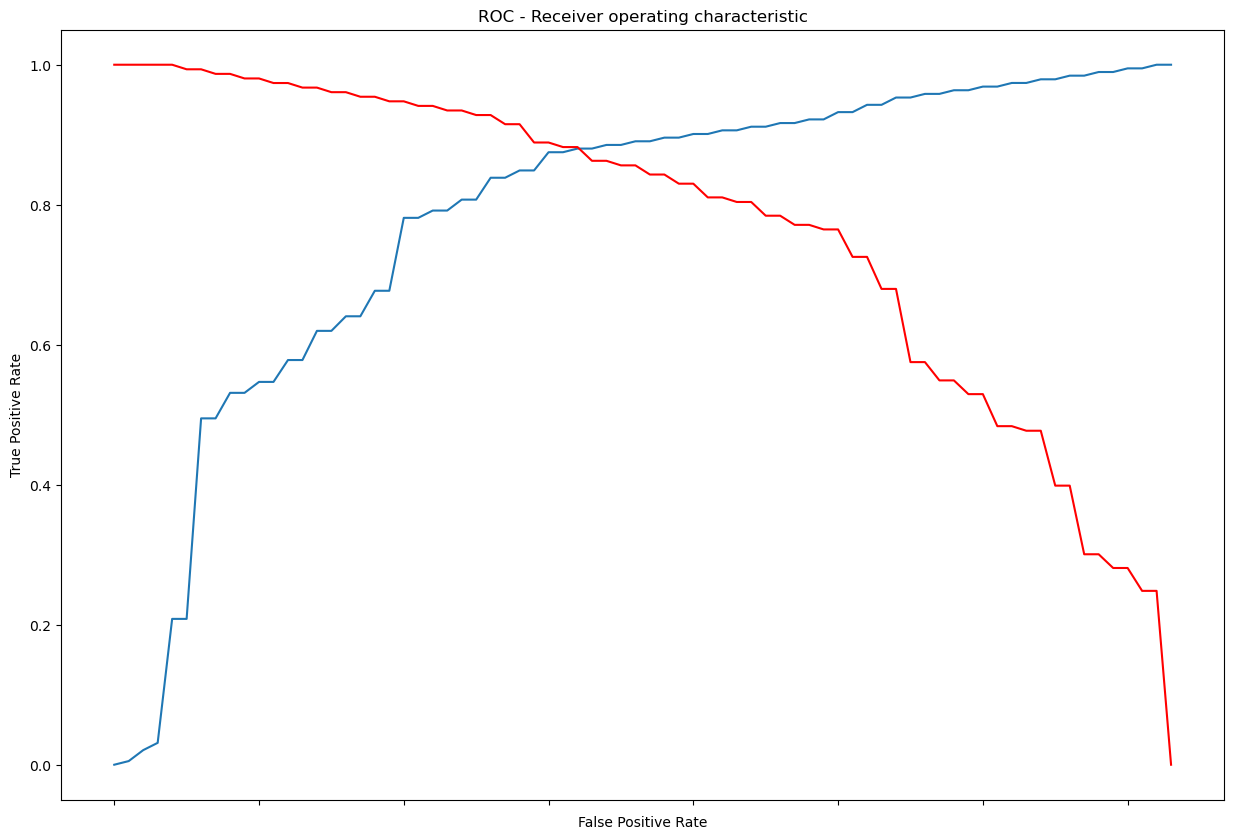

In [162]:
# Plotando a ROC (AUC) - Treinamento
fig, ax = plt.subplots()
plt.plot(roc_train['tpr'])
plt.plot(roc_train['1-fpr'], color = 'red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Receiver operating characteristic')
ax.set_xticklabels([]);
plt.gcf().set_size_inches(15, 10)

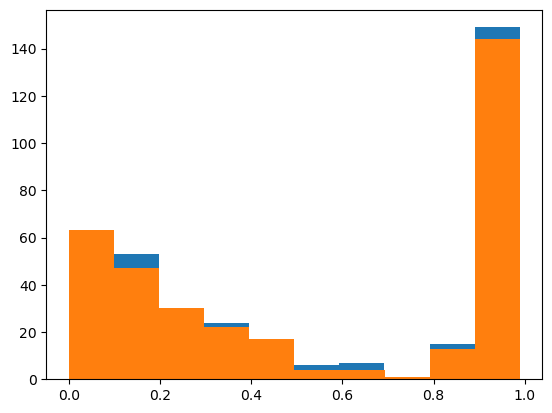

In [163]:
# Ajustando o ponto de corte

cutoff = 0.404

# Porém, atençao: veja que os scores finais nao sao assim tao granulares (base pequena/poucas variaveis)
# E hà concentraçao no 1

plt.hist(y_pred_train_)
plt.hist(y_pred_test_);

# o efeito aqui serà limitado pelo exemplo, mas em bases maiores o impacto é enorme

In [164]:
# Pre-processamento para a matriz de confusao - Os dados devem ser binarios
from sklearn.metrics import confusion_matrix

y_pred_train_bin = y_pred_train_
y_pred_test_bin = y_pred_test_

# Percorrendo e transformando toda as probabilidades do treinamento
for score in range(0, len(y_pred_train_-1)):
    if y_pred_train_.iloc[score] >= cutoff:
        y_pred_train_bin.iloc[score] = 1
    else:
        y_pred_train_bin.iloc[score] = 0
        

# Percorrendo e transformando toda as probabilidades do teste
for score in range(0, len(y_pred_test_-1)):
    if y_pred_test_.iloc[score] >= cutoff:
        y_pred_test_bin.iloc[score] = 1
    else:
        y_pred_test_bin.iloc[score] = 0

In [165]:
# Avaliando a base de treinamento
print("Avaliando a base de treinamento:")
print(confusion_matrix(y_train, y_pred_train_bin))
print("\n")
# Avaliando a base de teste
print("Avaliando a base de test:")
print(confusion_matrix(y_test, y_pred_test_bin))

Avaliando a base de treinamento:
[[135  18]
 [ 24 168]]


Avaliando a base de test:
[[133  21]
 [ 31 160]]
